## What to Know About PCA

In [2]:
%run load_data.py

In [3]:
from sklearn.decomposition import PCA

In [4]:
X = Z_bc_rmo

pca = PCA()
pca.fit(X)
customer_box_cox_sc_df_outliers_removed_pca = pca.transform(X)

The process of fitting a PCA model gives us three important outputs:

- the **explained variance**, $L$
- the **loadings**, $P$
- the **transformed data**, $X_p$

In [5]:
L = pca.explained_variance_

In [6]:
P = pca.components_
P_df = pd.DataFrame(P, columns=X.columns)

In [7]:
X_p = customer_box_cox_sc_df_outliers_removed_pca

### Use the Explained Variance to Identify Component Significance

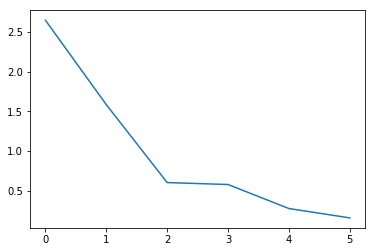

In [8]:
plt.plot(L)

### Use the Loadings to Explain the Components

In [14]:
P_df.index

RangeIndex(start=0, stop=6, step=1)

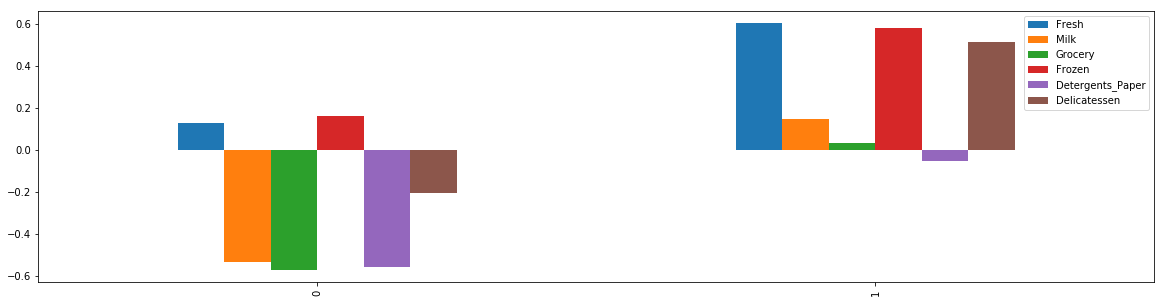

In [16]:
P_df.loc[:1].plot(kind="bar", figsize=(20,5))

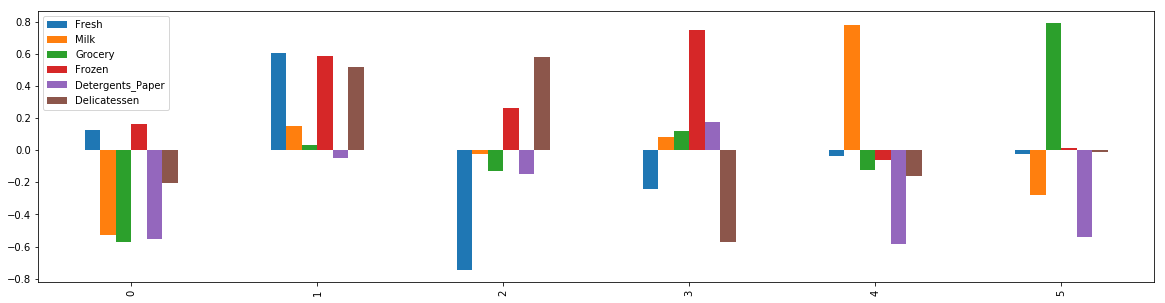

In [17]:
P_df.plot(kind="bar", figsize=(20,5))

### Use the Transformed Data in your ML Pipeline

In [11]:
X = Z_bc_rmo

pca = PCA(n_components=2)
pca.fit(X)
X_p = pd.DataFrame(pca.transform(X), index=X.index)

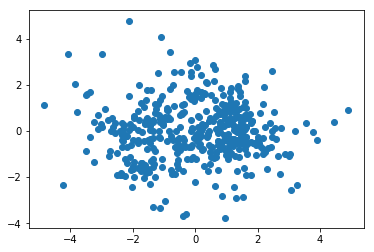

In [12]:
plt.scatter(X_p[0], X_p[1])

### One Last Thing to Think About - The Biplot

In [18]:
feature_vectors = pca.components_.T

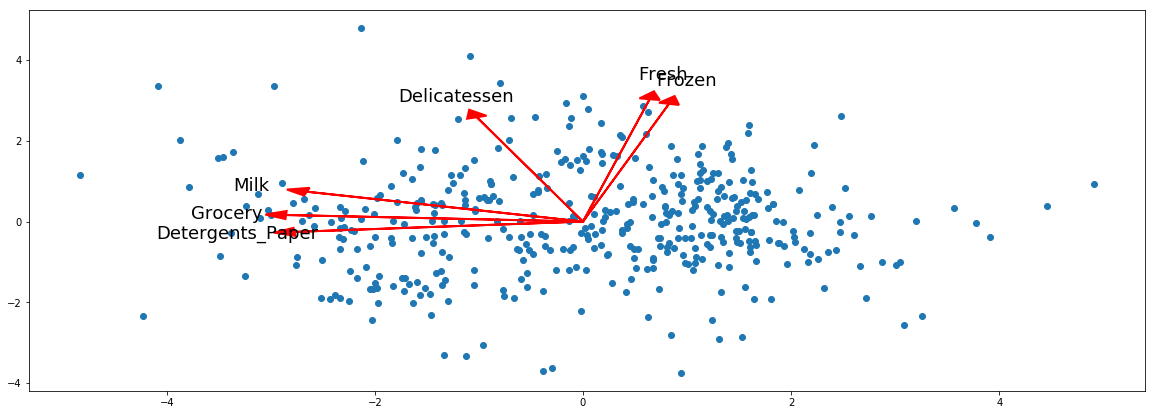

In [19]:
plt.figure(figsize=(20,7))
plt.scatter(X_p[0], X_p[1])
for i, v in enumerate(feature_vectors):
    plt.arrow(0, 0, 5*v[0], 5*v[1], 
              head_width=0.2, head_length=0.2, linewidth=2, color='red')
    plt.text(v[0]*6, v[1]*6, X.columns[i], color='black', 
             ha='center', va='center', fontsize=18)